# Lab 1: Códigos de Bloco

Alunos: Fernando Zanchitta e Guilherme Kowalczuk

# 1. Simulação

In [1]:
from channel import BSC
from encoder import HammingEncoder, NaiveEncoder
from lab1 import Simulator

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]
k = 4
l = 1000000//k

## 1.1. Naive Encoder

In [2]:
naive_encoder = NaiveEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(naive_encoder, channel, k=k, l=l), channels)
naive_sim = list(map(Simulator.simulate, sim))

print(list(zip(p, naive_sim)))

[(0.5, 0.499998), (0.2, 0.199352), (0.1, 0.100477), (0.05, 0.049736), (0.02, 0.019853), (0.01, 0.009831), (0.005, 0.004997), (0.002, 0.001935), (0.001, 0.001045), (0.0005, 0.000538), (0.0002, 0.000196), (0.0001, 0.000102), (5e-05, 4.9e-05), (2e-05, 2.1e-05), (1e-05, 1.2e-05)]


## 1.2. Hamming Encoder

In [4]:
hamming_encoder = HammingEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(hamming_encoder, channel, k=k, l=l), channels)
hamming_sim = list(map(Simulator.simulate, sim))

print(list(zip(p, hamming_sim)))

[(0.5, 0.50109), (0.2, 0.195069), (0.1, 0.066786), (0.05, 0.019224), (0.02, 0.003453), (0.01, 0.000893), (0.005, 0.000219), (0.002, 4.4e-05), (0.001, 5e-06), (0.0005, 0.0), (0.0002, 0.0), (0.0001, 0.0), (5e-05, 0.0), (2e-05, 0.0), (1e-05, 0.0)]


## 2. Comparação

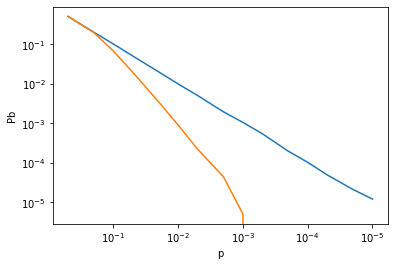

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import LogFormatterMathtext

# class CustomTicker(plt.LogFormatterSciNotation):
#     def __call__(self, x, pos=None):
#         if x not in [0.1,1,10]:
#             return plt.LogFormatterSciNotation.__call__(self,x, pos=None)
#         else:
#             return "{x:g}".format(x=x)

fig = plt.figure()
ax = plt.gca()
plt.plot(p, naive_sim, p, hamming_sim)
ax.set_yscale('log')
ax.set_xscale('log')
ax.invert_xaxis()
plt.xlabel('p')
plt.ylabel('Pb')
plt.minorticks_off()
plt.show()